In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from cv2 import dnn_superres
import os
import re
from skimage.metrics import structural_similarity

In [5]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [6]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

In [7]:
#load in the datasets
    #urban100
    #this is basically making a list of files for downscaled and target images
data_dir = '../data/image_SRF_4/'
low_res_images = [os.path.join(data_dir, y) for y in sorted([x for x in os.listdir(data_dir) if re.match(".*_LR.png", x)])]
high_res_images = [os.path.join(data_dir, y) for y in sorted([x for x in os.listdir(data_dir) if re.match(".*_HR.png", x)])]

In [8]:
#load in model

# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

# Read image

# Read the desired model
path = "trained_models/EDSR_x4.pb"
sr.readModel(path)

# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("edsr", 4)

In [9]:
#get upscaled image for each image using model
image = cv2.imread(low_res_images[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

result = sr.upsample(image)

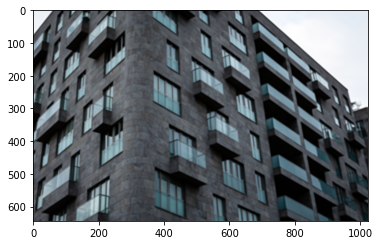

In [10]:
plt.imshow(result)

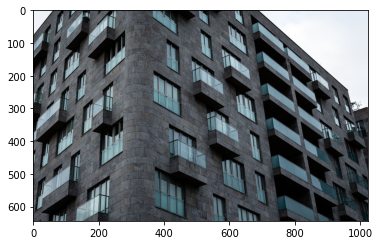

In [13]:
original = cv2.imread(high_res_images[0])
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original = cv2.resize(original, (result.shape[1],result.shape[0]))
plt.imshow(original)

In [14]:
PSNR(original, result)

31.330497329012836

In [33]:
def get_results(low_res_images, high_res_images):
    
    assert len(low_res_images) == len(high_res_images)
    psnr_values = []
    ssim_values = []
    
    for i in range(len(low_res_images)):
        image = image = cv2.imread(low_res_images[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        original = cv2.imread(high_res_images[i])
        original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
        
        #result = sr.upsample(image)
        result = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
        result = cv2.resize(result, (original.shape[1],original.shape[0]))
        
        psnr_values.append(cv2.PSNR(original, result))
        ssim_values.append(structural_similarity(original, result, channel_axis=2))
    
    return psnr_values, ssim_values


In [34]:
psnr_values, ssim_values = get_results(low_res_images, high_res_images)
#take average over the dataset

In [35]:
np.mean(psnr_values)

18.84995487567546

In [36]:
np.mean(ssim_values)

0.620349214728238